<img src='https://user-images.githubusercontent.com/6457691/90080969-0f758d00-dd47-11ea-8191-fa12fd2054a7.png' width = '200' align = 'right'>

## AI SC31x

---
# Sprint Challenge - 신경망(Neural Network) 기본기 다지기

Table of Problems

1. 신경망 정의하기 
2. 퍼셉트론 정의
    - 퍼셉트론(Perceptron)
    - 다층 퍼셉트론(Multilayer Perceptron)
    - 분석과 비교
4. Keras 사용하기

<a id="Q1"></a>
## 1. 신경망 용어 정의
### 1.1 아래에 주어진 신경망 개념에 사용 되는 용어들을 자신만의 언어로 정의해보세요
꼭 "자신의 언어"로 써보시고, 정리해보고, 요약해보세요 :)

- **Neuron:** 정보 처리의 단위
- **Input Layer:** 데이터를 입력받아 다음 계층으로 전달
- **Hidden Layer:** 가중치와 편향이 최적화되는 과정
- **Output Layer:** 예측 값을 나타내거나, 분류 문제에서 각 클래스에 대한 확률 값
- **Activation Function:** 입력 신호의 총합을 계산한 후, 활성화 함수를 통과시켜 출력 값을 생성
- **Back Propagation:** 출력값과 실제 값 사이의 오차를 계산하여 이 오차를 최소화하기 위해 가중치와 편향 값을 업데이트

### 1.2 역전파 설명해보기
이번에는 역전파 (Back Propagation)를 조금 더 디테일하게 설명해보겠습니다. 
<br> <b>초등학생</b>에게 설명한다는 생각으로 단어들을 선정해 주세요. <i>외부 자료나 이미지를 설명에 활용하셔도 좋습니다</i>.

In [1]:
#시험에서 100점 만점에 80점을 맞았으면 20점을 채우기위해 오답노트를 작성하여 더 발전시켜서 다시 시험치게 하는 것

### 1.3 퍼셉트론 정의해보기
신경망 수업 첫날에 들었었던 퍼셉트론의 간단한 개념으로 예측하는 과정을 설명해보세요. <br> <b>입력</b>에서 <b>출력</b>으로 어떻게 변경되는 지 단계별로 설명해보세요.

In [2]:
'''
1. 입력값을 받습니다. 이 때, 입력값은 뉴런에 있는 가중치와 함께 곱해집니다.
2. 가중치와 곱해진 입력값을 모두 합산합니다.
3. 편향이라는 값도 더해집니다.
4. 합산된 값을 임계치와 비교합니다. 이 때, 임계치보다 합산된 값이 크면 출력값은 1, 작으면 0이 됩니다.
5. 출력값을 내보냅니다
'''

'\n1. 입력값을 받습니다. 이 때, 입력값은 뉴런에 있는 가중치와 함께 곱해집니다.\n2. 가중치와 곱해진 입력값을 모두 합산합니다.\n3. 편향이라는 값도 더해집니다.\n4. 합산된 값을 임계치와 비교합니다. 이 때, 임계치보다 합산된 값이 크면 출력값은 1, 작으면 0이 됩니다.\n5. 출력값을 내보냅니다\n'

<a id="Q2"></a>
## 2. 단순 퍼셉트론

이번에는 TensorFlow, keras를 사용하여 두 개의 신경망을 직접 구축한 뒤,
<br> 아래 임의로 제공 된 $X, y$를 이용하여 두 모델에 적용한 뒤 결과를 비교해보세요. 
먼저 사용할 데이터는 다음과 같습니다.

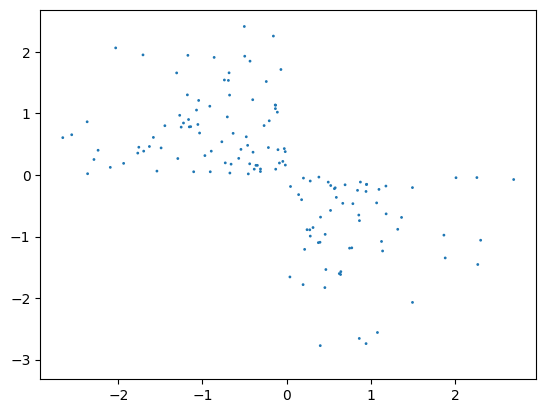

In [3]:
import numpy as np
import matplotlib.pyplot as plt

xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))
rng = np.random.RandomState(0)


"model1과 model2를 구축할 때 아래의 X & y를 사용하세요"
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), 
             dtype=int)

plt.scatter(X[:,0], X[:,1], s=y)


### 단순 퍼셉트론 구현
Keras로 <b>sigmoid activation function</b>을 포함한 dense layer 1개가 있는</b> `model1`을 만들어 학습시키고 `h1`에 저장하세요.

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model1 = Sequential([
    Dense(1, activation='sigmoid')
])
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

h1 = model1.fit(X,y,batch_size=30,epochs=30)

Epoch 1/30
10/10 [==============================] - 2s 14ms/step - loss: 0.7481 - accuracy: 0.4433
Epoch 2/30
10/10 [==============================] - 0s 3ms/step - loss: 0.7460 - accuracy: 0.4433
Epoch 3/30
10/10 [==============================] - 0s 5ms/step - loss: 0.7443 - accuracy: 0.4433
Epoch 4/30
10/10 [==============================] - 0s 3ms/step - loss: 0.7425 - accuracy: 0.4467
Epoch 5/30
10/10 [==============================] - 0s 5ms/step - loss: 0.7407 - accuracy: 0.4533
Epoch 6/30
10/10 [==============================] - 0s 5ms/step - loss: 0.7391 - accuracy: 0.4533
Epoch 7/30
10/10 [==============================] - 0s 3ms/step - loss: 0.7375 - accuracy: 0.4567
Epoch 8/30
10/10 [==============================] - 0s 3ms/step - loss: 0.7357 - accuracy: 0.4633
Epoch 9/30
10/10 [==============================] - 0s 5ms/step - loss: 0.7343 - accuracy: 0.4667
Epoch 10/30
10/10 [==============================] - 0s 10ms/step - loss: 0.7327 - accuracy: 0.4667
Epoch 11/30
10/10


### Multi-Layer Perceptron (MLP)
이번에는 여러층의 레이어들을 쌓은 MLP 모델을 만들어보겠습니다. 아래는 간략한 가이드입니다 :
- 2개의 은닉층 (출력 수를 맞추는 것까지 3개의 Dense를 사용할 것은 추천)
- 노드의 개수는 8-32개 내에서 변경해서 사용해보세요.
- Activation function과 optimizer는 이번 주에 배운 것들 중에서 자유롭게 골라보세요.
- 아래 만들어진 Callback function을 모델에 통합해서 사용하세요

MLP로 만들어진 `model2` 를 만들어 학습하고 `h2`에 저장하세요.

In [5]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > .90):   
            self.model.stop_training = True

In [6]:
model2 = Sequential()
model2.add(Dense(32, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

h2 = model2.fit(X, y, epochs=50, callbacks=[myCallback()])

Epoch 1/50
10/10 [==============================] - 4s 9ms/step - loss: 0.6951 - accuracy: 0.4767
Epoch 2/50
10/10 [==============================] - 0s 7ms/step - loss: 0.6596 - accuracy: 0.5900
Epoch 3/50
10/10 [==============================] - 0s 11ms/step - loss: 0.6320 - accuracy: 0.7133
Epoch 4/50
10/10 [==============================] - 0s 5ms/step - loss: 0.6074 - accuracy: 0.7600
Epoch 5/50
10/10 [==============================] - 0s 3ms/step - loss: 0.5819 - accuracy: 0.7867
Epoch 6/50
10/10 [==============================] - 0s 3ms/step - loss: 0.5567 - accuracy: 0.8167
Epoch 7/50
10/10 [==============================] - 0s 5ms/step - loss: 0.5304 - accuracy: 0.8333
Epoch 8/50
10/10 [==============================] - 0s 6ms/step - loss: 0.5067 - accuracy: 0.8333
Epoch 9/50
10/10 [==============================] - 0s 9ms/step - loss: 0.4833 - accuracy: 0.8333
Epoch 10/50
10/10 [==============================] - 0s 10ms/step - loss: 0.4591 - accuracy: 0.8533
Epoch 11/50
10/10

### Analyze and Compare

코드를 시작하기 전에 추가 라이브러리를 설치해야 합니다. 스프린트 과제에 사용 중인 환경에 패키지 `mlxtend`를 설치합니다. 설치코드를 직접 제작해보세요. 기존 자료들을 참고하면 쉽게 설치할 수 있을 것입니다. 

#### 아래 실행 버튼을 눌러 셀을 실행시킨 뒤, 진행해주세요.

In [7]:
# mlxtend 라이브러리를 설치합니다
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
#이 셀의 코드는 변경하지 마세요.

from itertools import cycle
from math import ceil, floor

import matplotlib.pyplot as plt
import numpy as np

from mlxtend.utils import check_Xy, format_kwarg_dictionaries


def get_feature_range_mask(X, filler_feature_values=None, filler_feature_ranges=None):
    """
    Function that constucts a boolean array to get rid of samples
    in X that are outside the feature range specified by filler_feature_values
    and filler_feature_ranges
    """

    if not isinstance(X, np.ndarray) or not len(X.shape) == 2:
        raise ValueError("X must be a 2D array")
    elif filler_feature_values is None:
        raise ValueError("filler_feature_values must not be None")
    elif filler_feature_ranges is None:
        raise ValueError("filler_feature_ranges must not be None")

    mask = np.ones(X.shape[0], dtype=bool)
    for feature_idx in filler_feature_ranges:
        feature_value = filler_feature_values[feature_idx]
        feature_width = filler_feature_ranges[feature_idx]
        upp_limit = feature_value + feature_width
        low_limit = feature_value - feature_width
        feature_mask = (X[:, feature_idx] > low_limit) & (X[:, feature_idx] < upp_limit)
        mask = mask & feature_mask

    return mask


def plot_decision_regions(
    X,
    y,
    clf,
    feature_index=None,
    filler_feature_values=None,
    filler_feature_ranges=None,
    ax=None,
    X_highlight=None,
    zoom_factor=1.0,
    legend=1,
    hide_spines=True,
    markers="s^oxv<>",
    colors=(
        "#1f77b4,#ff7f0e,#3ca02c,#d62728,"
        "#9467bd,#8c564b,#e377c2,"
        "#7f7f7f,#bcbd22,#17becf"
    ),
    scatter_kwargs=None,
    contourf_kwargs=None,
    contour_kwargs=None,
    scatter_highlight_kwargs=None,
):
    """Plot decision regions of a classifier.
    Please note that this functions assumes that class labels are
    labeled consecutively, e.g,. 0, 1, 2, 3, 4, and 5. If you have class
    labels with integer labels > 4, you may want to provide additional colors
    and/or markers as `colors` and `markers` arguments.
    See http://matplotlib.org/examples/color/named_colors.html for more
    information.
    Parameters
    ----------
    X : array-like, shape = [n_samples, n_features]
        Feature Matrix.
    y : array-like, shape = [n_samples]
        True class labels.
    clf : Classifier object.
        Must have a .predict method.
    feature_index : array-like (default: (0,) for 1D, (0, 1) otherwise)
        Feature indices to use for plotting. The first index in
        `feature_index` will be on the x-axis, the second index will be
        on the y-axis.
    filler_feature_values : dict (default: None)
        Only needed for number features > 2. Dictionary of feature
        index-value pairs for the features not being plotted.
    filler_feature_ranges : dict (default: None)
        Only needed for number features > 2. Dictionary of feature
        index-value pairs for the features not being plotted. Will use the
        ranges provided to select training samples for plotting.
    ax : matplotlib.axes.Axes (default: None)
        An existing matplotlib Axes. Creates
        one if ax=None.
    X_highlight : array-like, shape = [n_samples, n_features] (default: None)
        An array with data points that are used to highlight samples in `X`.
    zoom_factor : float (default: 1.0)
        Controls the scale of the x- and y-axis of the decision plot.
    hide_spines : bool (default: True)
        Hide axis spines if True.
    legend : int (default: 1)
        Integer to specify the legend location.
        No legend if legend is 0.
    markers : str (default: 's^oxv<>')
        Scatterplot markers.
    colors : str (default: 'red,blue,limegreen,gray,cyan')
        Comma separated list of colors.
    scatter_kwargs : dict (default: None)
        Keyword arguments for underlying matplotlib scatter function.
    contourf_kwargs : dict (default: None)
        Keyword arguments for underlying matplotlib contourf function.
    contour_kwargs : dict (default: None)
        Keyword arguments for underlying matplotlib contour function
        (which draws the lines between decision regions).
    scatter_highlight_kwargs : dict (default: None)
        Keyword arguments for underlying matplotlib scatter function.
    Returns
    ---------
    ax : matplotlib.axes.Axes object
    Examples
    -----------
    For usage examples, please see
    http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/
    """

    check_Xy(X, y, y_int=True)  # Validate X and y arrays
    dim = X.shape[1]

    if ax is None:
        ax = plt.gca()

    plot_testdata = True
    if not isinstance(X_highlight, np.ndarray):
        if X_highlight is not None:
            raise ValueError("X_highlight must be a NumPy array or None")
        else:
            plot_testdata = False
    elif len(X_highlight.shape) < 2:
        raise ValueError("X_highlight must be a 2D array")

    if feature_index is not None:
        # Unpack and validate the feature_index values
        if dim == 1:
            raise ValueError("feature_index requires more than one training feature")
        try:
            x_index, y_index = feature_index
        except ValueError:
            raise ValueError(
                "Unable to unpack feature_index. Make sure feature_index "
                "only has two dimensions."
            )
        try:
            X[:, x_index], X[:, y_index]
        except IndexError:
            raise IndexError(
                "feature_index values out of range. X.shape is {}, but "
                "feature_index is {}".format(X.shape, feature_index)
            )
    else:
        feature_index = (0, 1)
        x_index, y_index = feature_index

    # Extra input validation for higher number of training features
    if dim > 2:
        if filler_feature_values is None:
            raise ValueError(
                "Filler values must be provided when "
                "X has more than 2 training features."
            )

        if filler_feature_ranges is not None:
            if not set(filler_feature_values) == set(filler_feature_ranges):
                raise ValueError(
                    "filler_feature_values and filler_feature_ranges must "
                    "have the same keys"
                )

        # Check that all columns in X are accounted for
        column_check = np.zeros(dim, dtype=bool)
        for idx in filler_feature_values:
            column_check[idx] = True
        for idx in feature_index:
            column_check[idx] = True
        if not all(column_check):
            missing_cols = np.argwhere(~column_check).flatten()
            raise ValueError(
                "Column(s) {} need to be accounted for in either "
                "feature_index or filler_feature_values".format(missing_cols)
            )

    marker_gen = cycle(list(markers))

    n_classes = np.unique(y).shape[0]
    colors = colors.split(",")
    colors_gen = cycle(colors)
    colors = [next(colors_gen) for c in range(n_classes)]

    # Get minimum and maximum
    x_min, x_max = (
        X[:, x_index].min() - 1.0 / zoom_factor,
        X[:, x_index].max() + 1.0 / zoom_factor,
    )
    if dim == 1:
        y_min, y_max = -1, 1
    else:
        y_min, y_max = (
            X[:, y_index].min() - 1.0 / zoom_factor,
            X[:, y_index].max() + 1.0 / zoom_factor,
        )

    xnum, ynum = plt.gcf().dpi * plt.gcf().get_size_inches()
    xnum, ynum = floor(xnum), ceil(ynum)
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, num=xnum), np.linspace(y_min, y_max, num=ynum)
    )

    if dim == 1:
        X_predict = np.array([xx.ravel()]).T
    else:
        X_grid = np.array([xx.ravel(), yy.ravel()]).T
        X_predict = np.zeros((X_grid.shape[0], dim))
        X_predict[:, x_index] = X_grid[:, 0]
        X_predict[:, y_index] = X_grid[:, 1]
        if dim > 2:
            for feature_idx in filler_feature_values:
                X_predict[:, feature_idx] = filler_feature_values[feature_idx]
    Z = clf.predict(X_predict.astype(X.dtype))
    if Z.shape[1] == 2:
        Z = Z[:,1]
    Z = Z.reshape(xx.shape)
    # Plot decisoin region
    # Make sure contourf_kwargs has backwards compatible defaults
    contourf_kwargs_default = {"alpha": 0.45, "antialiased": True}
    contourf_kwargs = format_kwarg_dictionaries(
        default_kwargs=contourf_kwargs_default,
        user_kwargs=contourf_kwargs,
        protected_keys=["colors", "levels"],
    )
    cset = ax.contourf(
        xx, yy, Z, colors=colors, levels=np.arange(Z.max() + 2) - 0.5, **contourf_kwargs
    )

    contour_kwargs_default = {"linewidths": 0.5, "colors": "k", "antialiased": True}
    contour_kwargs = format_kwarg_dictionaries(
        default_kwargs=contour_kwargs_default,
        user_kwargs=contour_kwargs,
        protected_keys=[],
    )
    ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)

    ax.axis([xx.min(), xx.max(), yy.min(), yy.max()])

    # Scatter training data samples
    # Make sure scatter_kwargs has backwards compatible defaults
    scatter_kwargs_default = {"alpha": 0.8, "edgecolor": "black"}
    scatter_kwargs = format_kwarg_dictionaries(
        default_kwargs=scatter_kwargs_default,
        user_kwargs=scatter_kwargs,
        protected_keys=["c", "marker", "label"],
    )
    for idx, c in enumerate(np.unique(y)):
        if dim == 1:
            y_data = [0 for i in X[y == c]]
            x_data = X[y == c]
        elif dim == 2:
            y_data = X[y == c, y_index]
            x_data = X[y == c, x_index]
        elif dim > 2 and filler_feature_ranges is not None:
            class_mask = y == c
            feature_range_mask = get_feature_range_mask(
                X,
                filler_feature_values=filler_feature_values,
                filler_feature_ranges=filler_feature_ranges,
            )
            y_data = X[class_mask & feature_range_mask, y_index]
            x_data = X[class_mask & feature_range_mask, x_index]
        else:
            continue

        ax.scatter(
            x=x_data,
            y=y_data,
            c=colors[idx],
            marker=next(marker_gen),
            label=c,
            **scatter_kwargs
        )

    if hide_spines:
        ax.spines["right"].set_visible(False)
        ax.spines["top"].set_visible(False)
        ax.spines["left"].set_visible(False)
        ax.spines["bottom"].set_visible(False)
    ax.yaxis.set_ticks_position("left")
    ax.xaxis.set_ticks_position("bottom")
    if dim == 1:
        ax.axes.get_yaxis().set_ticks([])

    if plot_testdata:
        if dim == 1:
            x_data = X_highlight
            y_data = [0 for i in X_highlight]
        elif dim == 2:
            x_data = X_highlight[:, x_index]
            y_data = X_highlight[:, y_index]
        else:
            feature_range_mask = get_feature_range_mask(
                X_highlight,
                filler_feature_values=filler_feature_values,
                filler_feature_ranges=filler_feature_ranges,
            )
            y_data = X_highlight[feature_range_mask, y_index]
            x_data = X_highlight[feature_range_mask, x_index]

        # Make sure scatter_highlight_kwargs backwards compatible defaults
        scatter_highlight_defaults = {
            "c": "none",
            "edgecolor": "black",
            "alpha": 1.0,
            "linewidths": 1,
            "marker": "o",
            "s": 80,
        }
        scatter_highlight_kwargs = format_kwarg_dictionaries(
            default_kwargs=scatter_highlight_defaults,
            user_kwargs=scatter_highlight_kwargs,
        )
        ax.scatter(x_data, y_data, **scatter_highlight_kwargs)

    if legend:
        if dim > 2 and filler_feature_ranges is None:
            pass
        else:
            handles, labels = ax.get_legend_handles_labels()
            ax.legend(handles, labels, framealpha=0.3, scatterpoints=1, loc=legend)

    return ax

#### 아래 셀은 모형의 의사결정 경계도("model1" 및 "model2")를 생성합니다. 그림을 검토합니다.

22500/22500 [==============================] - 31s 1ms/step


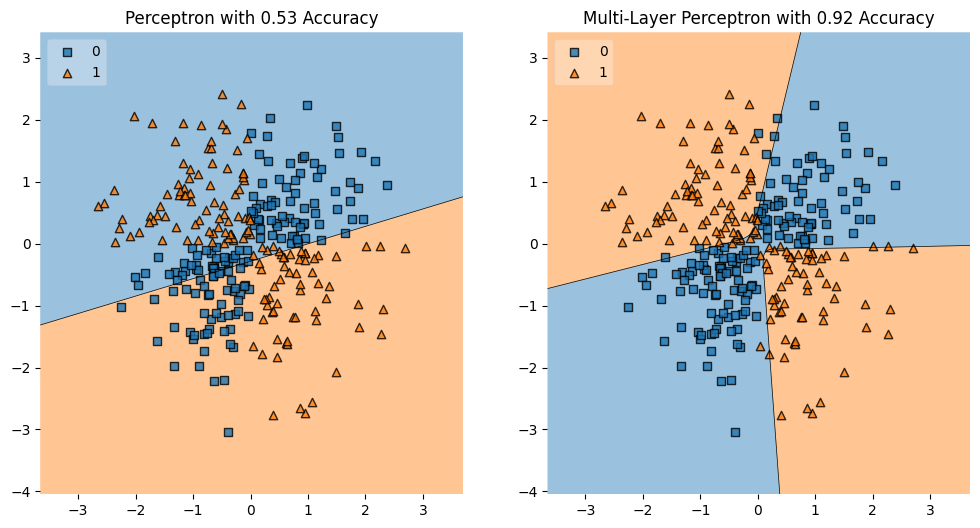

In [9]:
# 이 셀의 코드는 변경하지 마세요

h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - .2, X[:, 0].max() + .2
y_min, y_max = X[:, 1].min() - .2, X[:, 1].max() + .2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

fig = plt.figure(figsize=(12,6))


for clf, hist, name, grd in zip([model1,model2], [h1, h2],['Perceptron', 'Multi-Layer Perceptron'],[1,2]):

    ax = plt.subplot(1,2, grd)
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    title = f"{name} with {hist.history['accuracy'][-1]:,.2f} Accuracy"
    plt.title(title)

plt.show()

#### 대부분의 Perceptron("model1")의 정확도가 50-70% 정도로 나오실 것인데요, 왜 그것밖에 되지 않을까요? <br> 데이터 X와 레이블 y의 관계를 보다 정확하게 학습할 수 있는 다층 퍼셉트론의 구조적인 특징은 무엇일까요? (설명을 하실 때 우리가 배웠었던 특징 추출의 관점에서 설명을 해보시길 바랍니다.)

In [10]:
'''
model1은 데이터의 선형 분리 가능성이 있는 경우에만 잘 작동하며, 그렇지 않은 경우에는 제대로 학습하지 못할 수 있습니다.
MLP는 이러한 한계를 극복하기 위해 여러 개의 은닉층(hidden layer)을 추가한 신경망 모델입니다.
은닉층을 추가함으로써 다양한 특징(feature)을 추출할 수 있으며, 이를 통해 데이터의 비선형적인 관계를 모델링할 수 있습니다.
'''

'\nmodel1은 데이터의 선형 분리 가능성이 있는 경우에만 잘 작동하며, 그렇지 않은 경우에는 제대로 학습하지 못할 수 있습니다.\nMLP는 이러한 한계를 극복하기 위해 여러 개의 은닉층(hidden layer)을 추가한 신경망 모델입니다.\n은닉층을 추가함으로써 다양한 특징(feature)을 추출할 수 있으며, 이를 통해 데이터의 비선형적인 관계를 모델링할 수 있습니다.\n'

## 3. Keras MLP 튜닝

이번에는 Keras 라이브러리를 사용하여 선택한 MultiLayer Perceptron(MLP) 아키텍처를 구현해보겠습니다. 극히 단순한 모델부터 복잡한 모델까지 만들어 보실 수 있습니다. 모델을 학습하고 정확도를 구해보세요. 
<br> 그런 다음 최소 <b>두 개</b>의 파라미터를 튜닝한 후에 다시 모형의 정확도를 구해보고 이전 모델과 비교해보세요. 
<br> 아래 Cell에서 심장병 데이터 세트를 불러 온 후 이진 분류 모델 (binary classification model) 을 만들어 보세요. 이진 분류 작업에 적절한 손실 함수를 사용하고, 신경망의 마지막 계층에서 적절한 출력값과 활성화 함수를 사용합니다. 
<br> 세부적인 출력을 사용하여 빠르게 수렴할 수 있도록 모델을 학습해보는 것도 중요합니다. GridSearchCV 또는 RandomSearchCV를 사용하여 모델을 하이퍼 파라미터들을 튜닝해봅니다. (최소 두 개의 하이퍼 파라미터를 튜닝해봅니다) 하이퍼 파라미터 튜닝 시 새로운 각 실험에 대해 코드 셀을 추가하여 작업하는 방법을 배워보았는데, 그대로 이용하지 말고 변형을 해서 보여주고 싶은 내용을 정리해서 보여주세요.  
<br> 테스트할 때 하이퍼 파라미터의 각 조합에 대한 정확도를 보고하여 가장 높은 정확도를 얻을 수 있는 결과를 쉽게 확인할 수 있도록 합니다. 
<br> 이 SC에서 **3점**을 얻으려면 **최소 3개의 파라미터**를 조정해야 합니다.

- BatchNormalization을 레이어에 추가하면 성능이 많이 오를 수 있습니다. 
- 하지만 BatchNormalization을 사용하기 위해서는 Batch_size 옵션을 추가해야 합니다.

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/heart.csv')
df = df.sample(frac=1)
print(df.shape)
df.head()


(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
214,56,1,0,125,249,1,0,144,1,1.2,1,1,2,0
52,62,1,2,130,231,0,1,146,0,1.8,1,3,3,1
242,64,1,0,145,212,0,0,132,0,2.0,1,2,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
27,51,1,2,110,175,0,1,123,0,0.6,2,0,2,1


In [12]:
target = 'target'
X = df.drop(target, axis=1)
y = df[target]
X,y

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 214   56    1   0       125   249    1        0      144      1      1.2   
 52    62    1   2       130   231    0        1      146      0      1.8   
 242   64    1   0       145   212    0        0      132      0      2.0   
 3     56    1   1       120   236    0        1      178      0      0.8   
 27    51    1   2       110   175    0        1      123      0      0.6   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 209   59    1   0       140   177    0        1      162      1      0.0   
 213   61    0   0       145   307    0        0      146      1      1.0   
 262   53    1   0       123   282    0        1       95      1      2.0   
 264   54    1   0       110   206    0        0      108      1      0.0   
 4     57    0   0       120   354    0        1      163      1      0.6   
 
      slope  ca  thal  
 214      1   1     2  
 52       1   3     3  
 2

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.2, random_state=42
)

In [14]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
tf.random.set_seed(42)
def model_func(layer1_node=8, layer2_node=8, optimizer='sgd'):
 model_mlp = Sequential()
 model_mlp.add(Dense(layer1_node, activation='relu'))
 model_mlp.add(Dense(layer2_node, activation='relu'))
 model_mlp.add(Dense(1, activation='sigmoid'))
 model_mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
 return model_mlp
cls_model = KerasClassifier(build_fn=model_func)

<ipython-input-14-fbdb08286d27>:10: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  cls_model = KerasClassifier(build_fn=model_func)


In [18]:
from sklearn.model_selection import RandomizedSearchCV
layer1_nodes=(8, 16, 32)
layer2_nodes=(8, 16, 32)
optimizers=('sgd', 'rmsprop', 'adam')
param_random= dict(layer1_node=layer1_nodes, layer2_node=layer2_nodes, optimizer=optimizers)

In [20]:
randomCV = RandomizedSearchCV(estimator=cls_model, param_distributions=param_random, cv=5)
randomCV_result = randomCV.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Epoch 26/50
7/7 [==============================] - 0s 6ms/step - loss: 0.5492 - accuracy: 0.7461 - val_loss: 0.4942 - val_accuracy: 0.8033
Epoch 27/50
7/7 [==============================] - 0s 6ms/step - loss: 0.5281 - accuracy: 0.7047 - val_loss: 0.5571 - val_accuracy: 0.7213
Epoch 28/50
7/7 [==============================] - 0s 6ms/step - loss: 0.6016 - accuracy: 0.6736 - val_loss: 0.5564 - val_accuracy: 0.7377
Epoch 29/50
7/7 [==============================] - 0s 6ms/step - loss: 0.6551 - accuracy: 0.6891 - val_loss: 0.5068 - val_accuracy: 0.7705
Epoch 30/50
7/7 [==============================] - 0s 7ms/step - loss: 0.5193 - accuracy: 0.7409 - val_loss: 0.5178 - val_accuracy: 0.7213
Epoch 31/50
7/7 [==============================] - 0s 8ms/step - loss: 0.5690 - accuracy: 0.7047 - val_loss: 0.5598 - val_accuracy: 0.7049
Epoch 32/50
7/7 [==============================] - 0s 7ms/step - loss: 0.7503 - accuracy: 0.6736 - val_loss: 0.6269 - val_accuracy

In [21]:
print(f"""Best Result : {randomCV_result.best_score_}
Parameter : {randomCV_result.best_params_}""")

Best Result : 0.6981617689132691
Parameter : {'optimizer': 'adam', 'layer2_node': 8, 'layer1_node': 32}


In [22]:
!pip install -U keras-tuner
import keras_tuner as kt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 5.7 MB/s eta 0:00:00


In [95]:
def model_builder(hp):
 model = Sequential()
 hp_units1 = hp.Choice('units1',values=[16,32,64,128])
 model.add(Dense(hp_units1, activation='relu'))
 hp_units2 = hp.Choice('units2',values=[16,32,64,128])
 model.add(Dense(hp_units2, activation='relu'))

 model.add(Dense(1, activation='sigmoid'))
 hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4])
 model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = hp_learning_rate),
               loss='binary_crossentropy',
               metrics=['accuracy']
                   )


 return model

In [100]:
tuner = kt.Hyperband(model_builder,
                     objective = 'val_accuracy', # 학습 진행 지표를 문자열로 받습니다.
                     max_epochs = 100, # 학습을 진행할 최대 epoch 수입니다.
                     factor = 3, # iteration, epoch 등을 감소시킬 계수이며 default=3입니다.
                     directory = 'my_tuner', # 튜닝 결과를 저장할 directory를 설정합니다.
                     project_name = 'intro_to_kt')

In [101]:
import IPython
class ClearTrainingOutput(tf.keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)

In [102]:
tuner.search(X_train, y_train, epochs = 10, validation_data = (X_test, y_test), callbacks = [ClearTrainingOutput()])

best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0] # 반환할 최고의 조합을 선언합니다. num_trials = 1은 개체 수를 의미합니다.

Trial 41 Complete [00h 00m 02s]
val_accuracy: 0.4754098355770111

Best val_accuracy So Far: 0.7540983557701111
Total elapsed time: 00h 01m 24s


In [103]:
print(f"""
하이퍼 파라미터 검색이 완료되었습니다. 
최적화된 첫 번째 Dense 노드 수는 {best_hps.get('units1')} 입니다.
최적화된 두 번째 Dense 노드 수는 {best_hps.get('units2')} 입니다.
최적의 학습 속도는 {best_hps.get('learning_rate')} 입니다.
""")


하이퍼 파라미터 검색이 완료되었습니다. 
최적화된 첫 번째 Dense 노드 수는 128 입니다.
최적화된 두 번째 Dense 노드 수는 128 입니다.
최적의 학습 속도는 0.01 입니다.

